In [1]:
import scanpy as sc
import omicverse as ov
ov.plot_set()


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.11, Tutorials: https://omicverse.readthedocs.io/
Dependency error: The 'phate>=1.0' distribution was not found and is required by the application


In [2]:
adata = ov.read('/home/lugli/spuccio/Projects/SP039/GBmap/Darmanis2017_Part1.h5ad')

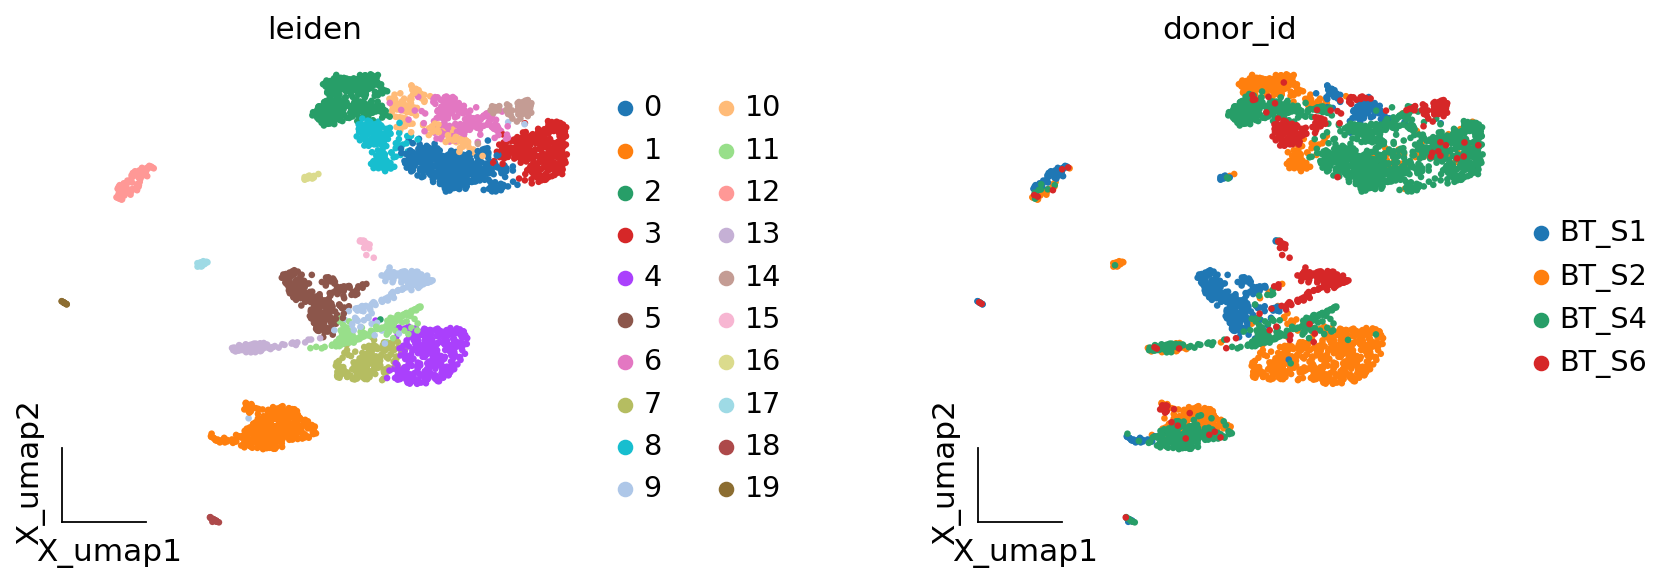

In [3]:
ov.pl.embedding(adata,
                basis='X_umap',
                color=['leiden', 'donor_id'],
                frameon='small',wspace=0.5)

In [4]:
ov.single.batch_correction(adata,batch_key='donor_id',
                                        methods='harmony',n_pcs=50)
adata

2025-03-28 18:12:21,989 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


...Begin using harmony to correct batch effect


2025-03-28 18:12:24,059 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-03-28 18:12:24,078 - harmonypy - INFO - Iteration 1 of 10
2025-03-28 18:12:24,594 - harmonypy - INFO - Iteration 2 of 10
2025-03-28 18:12:25,135 - harmonypy - INFO - Iteration 3 of 10
2025-03-28 18:12:25,674 - harmonypy - INFO - Iteration 4 of 10
2025-03-28 18:12:26,230 - harmonypy - INFO - Iteration 5 of 10
2025-03-28 18:12:26,772 - harmonypy - INFO - Iteration 6 of 10
2025-03-28 18:12:27,167 - harmonypy - INFO - Iteration 7 of 10
2025-03-28 18:12:27,420 - harmonypy - INFO - Iteration 8 of 10
2025-03-28 18:12:27,673 - harmonypy - INFO - Iteration 9 of 10
2025-03-28 18:12:27,925 - harmonypy - INFO - Converged after 9 iterations


AnnData object with n_obs × n_vars = 3393 × 2000
    obs: 'author', 'donor_id', 'is_primary_data', 'annotation_level_1', 'annotation_level_2', 'annotation_level_3', 'gbmap', 'method', 'stage', 'location', 'EGFR', 'MET', 'p53', 'TERT', 'ATRX', 'PTEN', 'MGMT', 'chr1p19q', 'PDGFR', 'suspension_type', 'tissue_ontology_term_id', 'cell_type', 'assay', 'tissue', 'development_stage', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'leiden'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'X_approximate_distribution', 'batch_condition', 'default_embedding', 'donor_id_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'schema_version', 'title', 'umap'
    obsm: 'X_pca', 'X_umap'

In [5]:
ov.pp.neighbors(adata, n_neighbors=15, n_pcs=50,
               use_rep='X_harmony')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)


In [6]:
%%time
ov.pp.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:07)
CPU times: user 8.03 s, sys: 4.06 s, total: 12.1 s
Wall time: 7.38 s


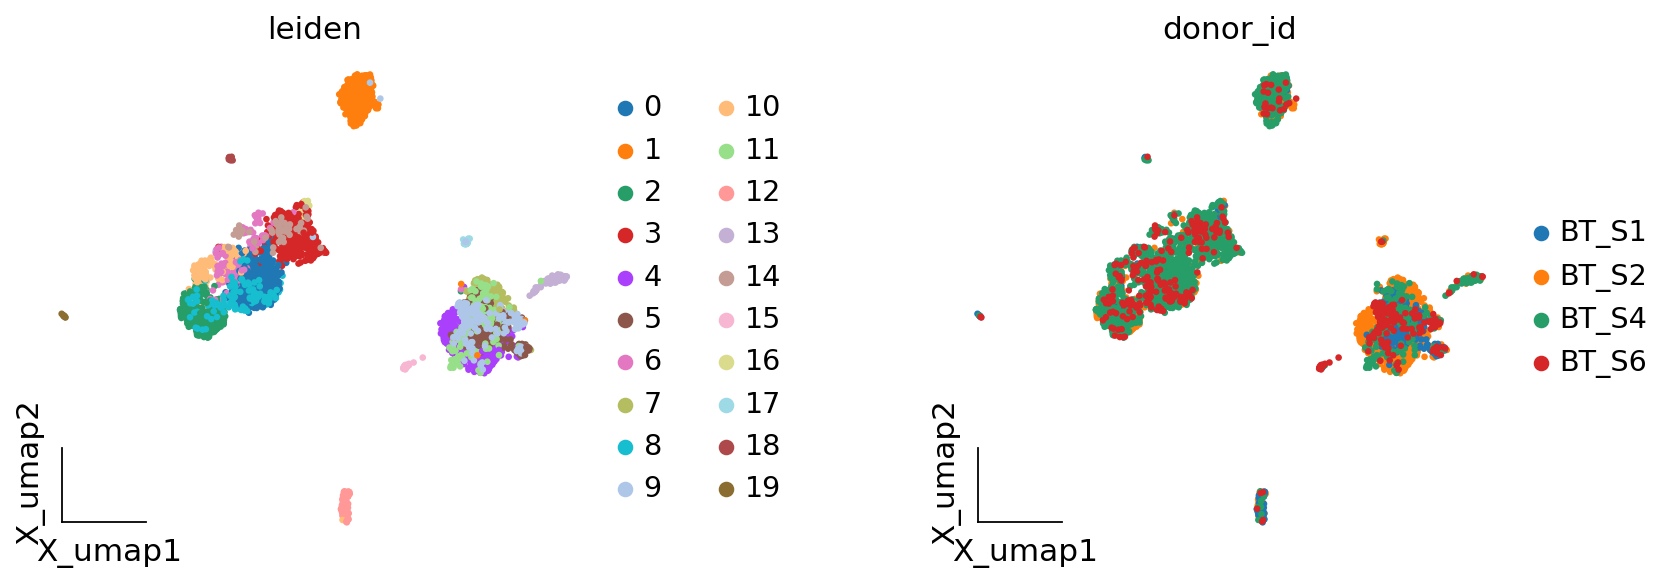

In [7]:
ov.pl.embedding(adata,
                basis='X_umap',
                color=['leiden', 'donor_id'],
                frameon='small',wspace=0.5)

In [8]:
ov.pp.leiden(adata,resolution=0.5)

running Leiden clustering
    finished: found 12 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


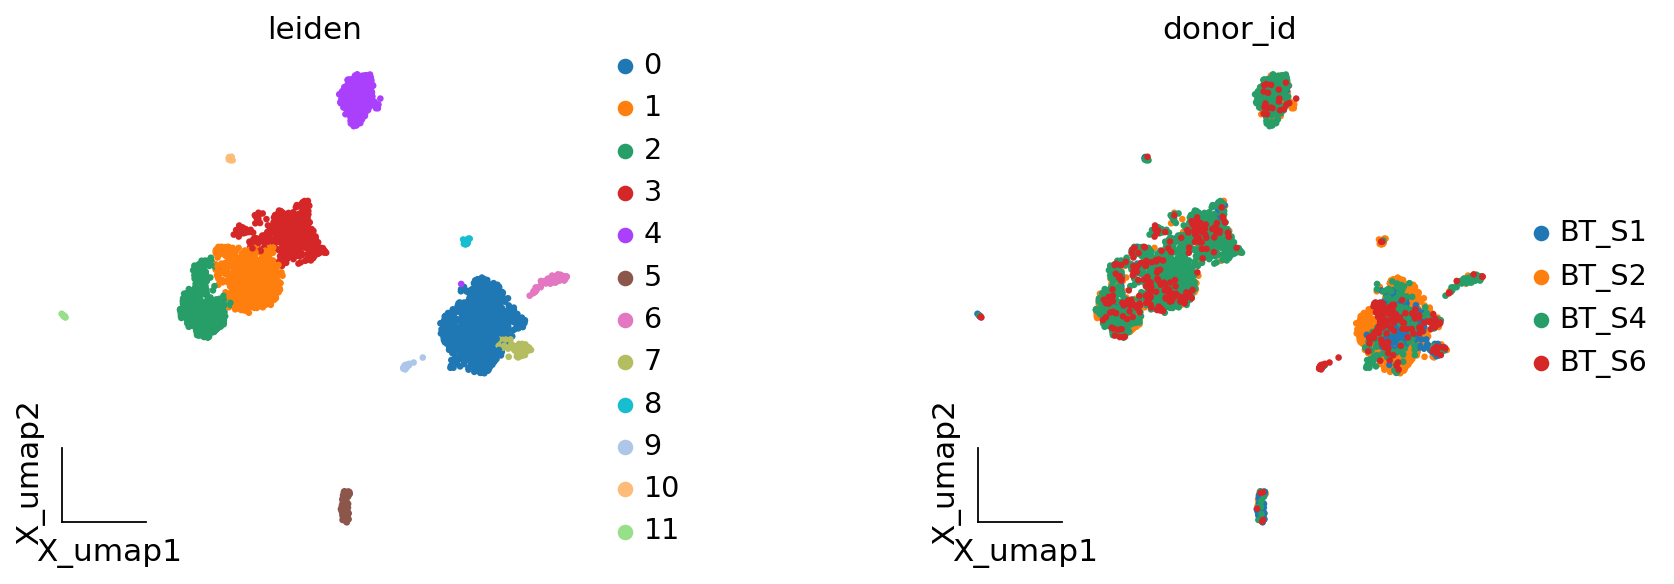

In [9]:
ov.pl.embedding(adata,
                basis='X_umap',
                color=['leiden', 'donor_id'],
                frameon='small',wspace=0.5)

In [10]:
scsa=ov.single.pySCSA(adata=adata,
                      foldchange=1.5,
                      pvalue=0.01,
                      celltype='normal',
                      target='cellmarker',
                      tissue='Brain',
                      model_path='/home/lugli/spuccio/Projects/SP039/pySCSA_2024_v1_plus.db'                    
)

In [11]:
anno=scsa.cell_anno(clustertype='leiden',
               cluster='all',rank_rep=True)

ranking genes
    finished (0:00:04)
...Auto annotate cell
Version V2.2 [2024/12/18]
DB load: GO_items:47347,Human_GO:3,Mouse_GO:3,
CellMarkers:82887,CancerSEA:1574,PanglaoDB:24223
Ensembl_HGNC:61541,Ensembl_Mouse:55414
Version V2.2 [2024/12/18]
DB load: GO_items:47347,Human_GO:3,Mouse_GO:3,
CellMarkers:82887,CancerSEA:1574,PanglaoDB:24223
Ensembl_HGNC:61541,Ensembl_Mouse:55414
load markers: 8838
Cluster 0 Gene number: 2720
Other Gene number: 946
Cluster 1 Gene number: 1085
Other Gene number: 933
Cluster 10 Gene number: 544
Other Gene number: 967
Cluster 11 Gene number: 416
Other Gene number: 969
Cluster 2 Gene number: 594
Other Gene number: 963
Cluster 3 Gene number: 760
Other Gene number: 937
Cluster 4 Gene number: 2068
Other Gene number: 908
Cluster 5 Gene number: 744
Other Gene number: 956
Cluster 6 Gene number: 1329
Other Gene number: 949
Cluster 7 Gene number: 3245
Other Gene number: 959
Cluster 8 Gene number: 2636
Other Gene number: 929
Cluster 9 Gene number: 520
Other Gene numb

In [12]:
scsa.cell_auto_anno(adata,key='scsa_celltype_cellmarker')

...cell type added to scsa_celltype_cellmarker on obs of anndata


In [13]:
scsa=ov.single.pySCSA(adata=adata,
                          foldchange=1.5,
                          pvalue=0.01,
                          celltype='normal',
                          target='panglaodb',
                          tissue='Brain',
                          model_path='/home/lugli/spuccio/Projects/SP039/pySCSA_2024_v1_plus.db'
                          
)

In [14]:
res=scsa.cell_anno(clustertype='leiden',
               cluster='all',rank_rep=True)

ranking genes
    finished (0:00:04)
...Auto annotate cell
Version V2.2 [2024/12/18]
DB load: GO_items:47347,Human_GO:3,Mouse_GO:3,
CellMarkers:82887,CancerSEA:1574,PanglaoDB:24223
Ensembl_HGNC:61541,Ensembl_Mouse:55414
Version V2.2 [2024/12/18]
DB load: GO_items:47347,Human_GO:3,Mouse_GO:3,
CellMarkers:82887,CancerSEA:1574,PanglaoDB:24223
Ensembl_HGNC:61541,Ensembl_Mouse:55414
load markers: 8838
Cluster 0 Gene number: 2720
Other Gene number: 3198
Cluster 1 Gene number: 1085
Other Gene number: 3221
Cluster 10 Gene number: 544
Other Gene number: 3329
Cluster 11 Gene number: 416
Other Gene number: 3322
Cluster 2 Gene number: 594
Other Gene number: 3313
Cluster 3 Gene number: 760
Other Gene number: 3258
Cluster 4 Gene number: 2068
Other Gene number: 3161
Cluster 5 Gene number: 744
Other Gene number: 3299
Cluster 6 Gene number: 1329
Other Gene number: 3273
Cluster 7 Gene number: 3245
Other Gene number: 3202
Cluster 8 Gene number: 2636
Other Gene number: 3131
Cluster 9 Gene number: 520
Othe

In [15]:
scsa.cell_anno_print()

Cluster:0	Cell_type:Podocytes|Müller Cells	Z-score:2.327|2.259
Cluster:1	Cell_type:Macrophages|Microglia	Z-score:3.775|3.604
Cluster:2	Cell_type:Microglia|Macrophages	Z-score:4.243|4.088
Cluster:3	Cell_type:Macrophages|Monocytes	Z-score:3.785|3.175
Cluster:4	Cell_type:Neurons|Interneurons	Z-score:3.342|3.108
Nice:Cluster:5	Cell_type:Oligodendrocytes	Z-score:8.837
Cluster:6	Cell_type:Astrocytes|Bergmann Glia	Z-score:4.94|3.81
Nice:Cluster:7	Cell_type:Pluripotent Stem Cells	Z-score:6.041
Cluster:8	Cell_type:Neurons|Interneurons	Z-score:4.75|4.418
Cluster:9	Cell_type:Fibroblasts|Pericytes	Z-score:4.047|2.793
Cluster:10	Cell_type:Pericytes|Fibroblasts	Z-score:3.502|2.555
Nice:Cluster:11	Cell_type:Endothelial Cells	Z-score:8.52


In [16]:
scsa.cell_auto_anno(adata,key='scsa_celltype_panglaodb')

...cell type added to scsa_celltype_panglaodb on obs of anndata


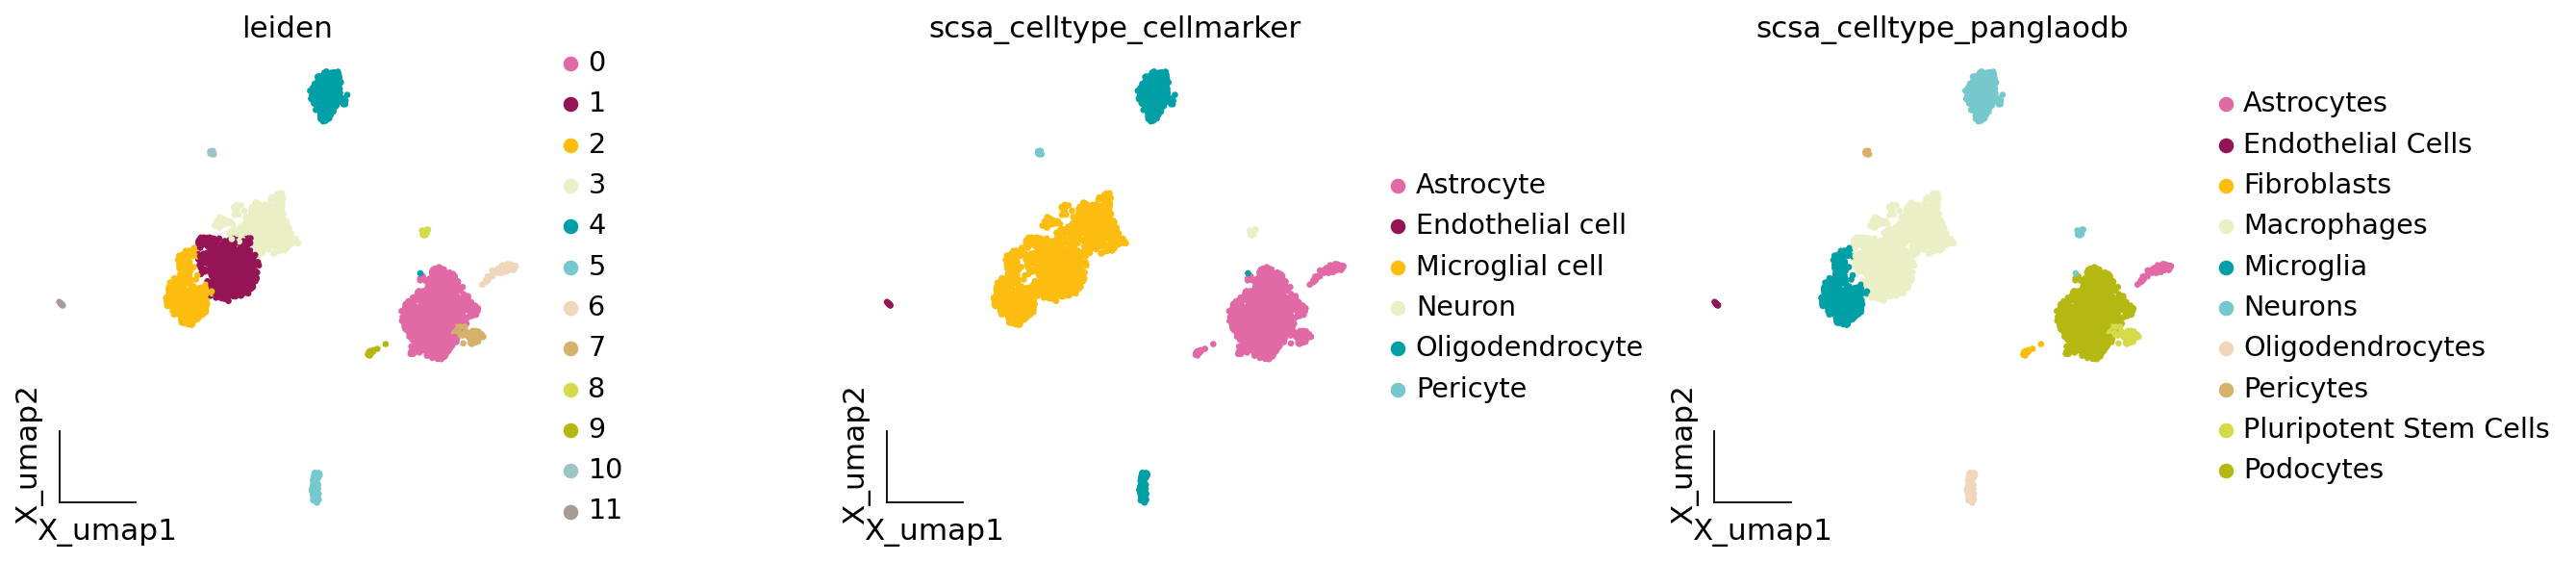

In [17]:
ov.utils.embedding(adata,
                   basis='X_umap',
                   color=['leiden','scsa_celltype_cellmarker','scsa_celltype_panglaodb'],
                   frameon='small',
                   legend_fontoutline=2,palette=ov.utils.palette()[14:],wspace=0.5
                  )

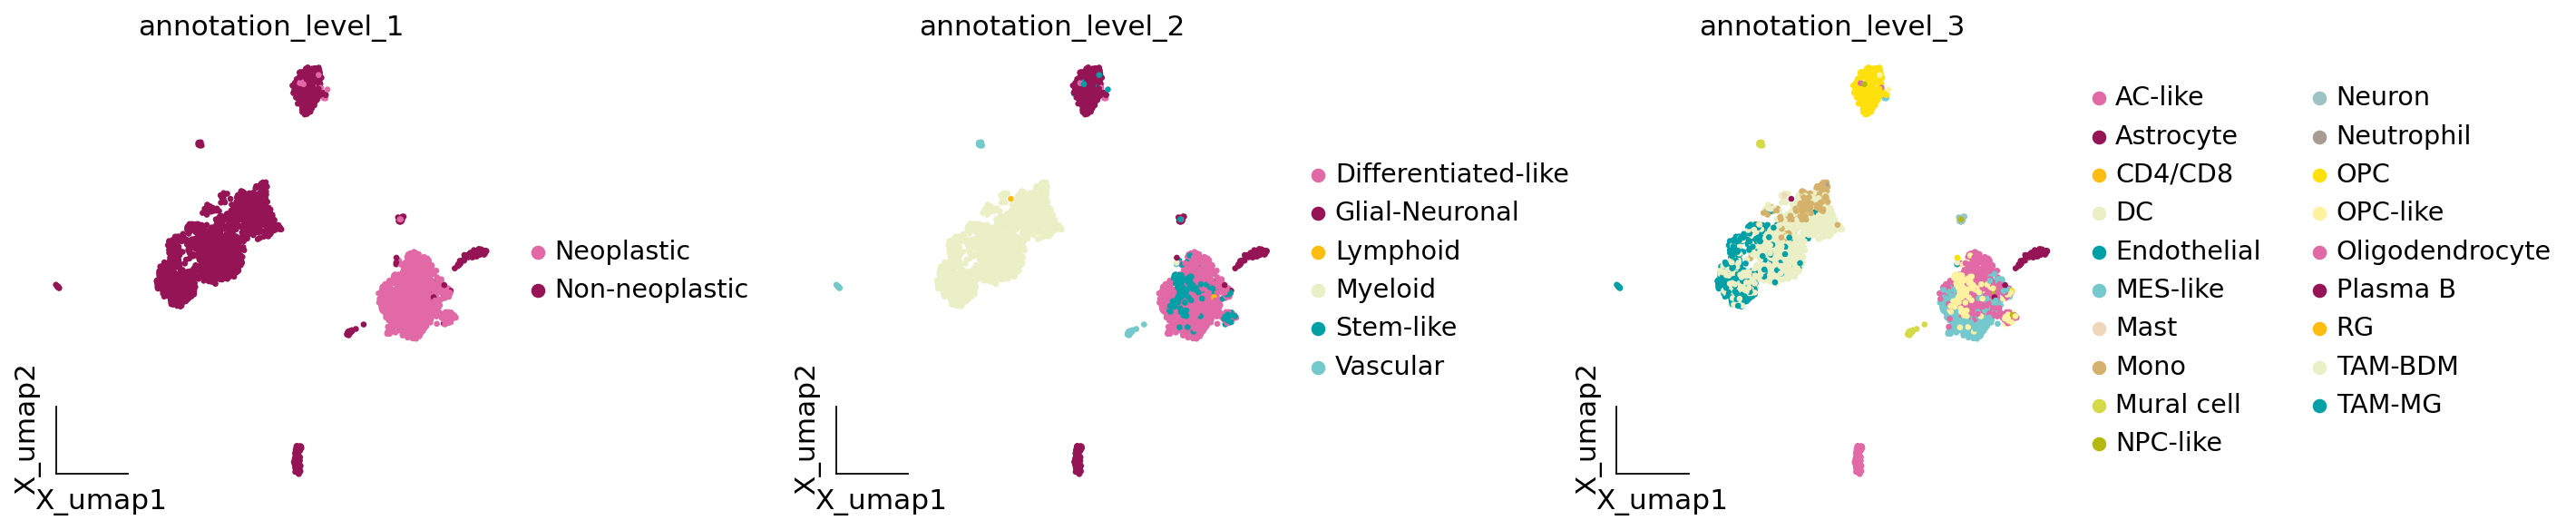

In [18]:
ov.utils.embedding(adata,
                   basis='X_umap',
                   color=['annotation_level_1','annotation_level_2','annotation_level_3'],
                   frameon='small',
                   legend_fontoutline=2,palette=ov.utils.palette()[14:],wspace=0.5
                  )

In [19]:
adata

AnnData object with n_obs × n_vars = 3393 × 2000
    obs: 'author', 'donor_id', 'is_primary_data', 'annotation_level_1', 'annotation_level_2', 'annotation_level_3', 'gbmap', 'method', 'stage', 'location', 'EGFR', 'MET', 'p53', 'TERT', 'ATRX', 'PTEN', 'MGMT', 'chr1p19q', 'PDGFR', 'suspension_type', 'tissue_ontology_term_id', 'cell_type', 'assay', 'tissue', 'development_stage', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'leiden', 'scsa_celltype_cellmarker', 'scsa_celltype_panglaodb'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'X_approximate_distribution', 'batch_condition', 'default_embedding', 'donor_id_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'schem

In [20]:
del adata.obs['is_primary_data']

In [21]:
del adata.obs['gbmap']

In [22]:
del adata.obs['tissue_ontology_term_id']

In [23]:
adata.write("/home/lugli/spuccio/Projects/SP039/GBmap/Darmanis2017_Part2.h5ad")

In [24]:
adata

AnnData object with n_obs × n_vars = 3393 × 2000
    obs: 'author', 'donor_id', 'annotation_level_1', 'annotation_level_2', 'annotation_level_3', 'method', 'stage', 'location', 'EGFR', 'MET', 'p53', 'TERT', 'ATRX', 'PTEN', 'MGMT', 'chr1p19q', 'PDGFR', 'suspension_type', 'cell_type', 'assay', 'tissue', 'development_stage', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'leiden', 'scsa_celltype_cellmarker', 'scsa_celltype_panglaodb'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'X_approximate_distribution', 'batch_condition', 'default_embedding', 'donor_id_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'schema_version', 'title', 'umap', 'rank_genes_groups', 'scsa